In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
# Paths for data.
Ravdess = "C:\\Users\\Sarvadnya\\audio_speech_actors_01-24"
Crema = "C:\\Users\\Sarvadnya\\AudioWAV"
Tess = "C:\\Users\\Sarvadnya\\TESS Toronto emotional speech set data"
Savee = "C:\\Users\\Sarvadnya\\ALL"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + '\\' + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '\\' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + '\\' + dir)
    for file in directories:
        # Split the filename by underscores and take the last element
        part = file.split('_')[-1].split('.')[0]
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '\\' + file)
        
# Create a DataFrame for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Create a DataFrame for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate emotion and path DataFrames
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()


In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path

In [ ]:
data_path['Emotions'].replace('Fear','fear',inplace=True)
data_path['Emotions'].replace('Sad','sad',inplace=True)
data_path['Emotions'].replace('surprised','surprise',inplace=True)

In [ ]:
data_path['Emotions'].value_counts()

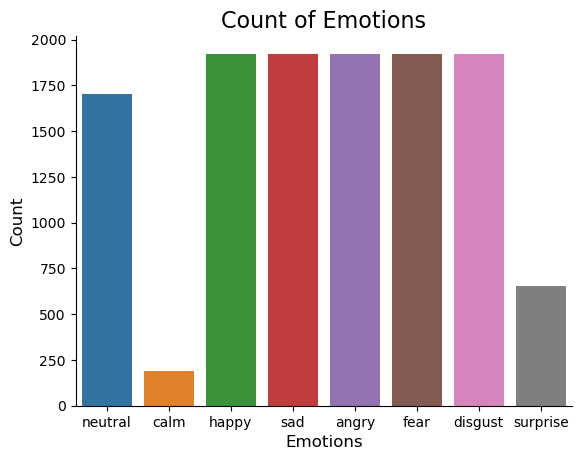

In [3]:
plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions')  # Assuming 'Emotions' is the column containing categorical data
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [4]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [2]:
data_path=pd.read_csv('data_path.csv')

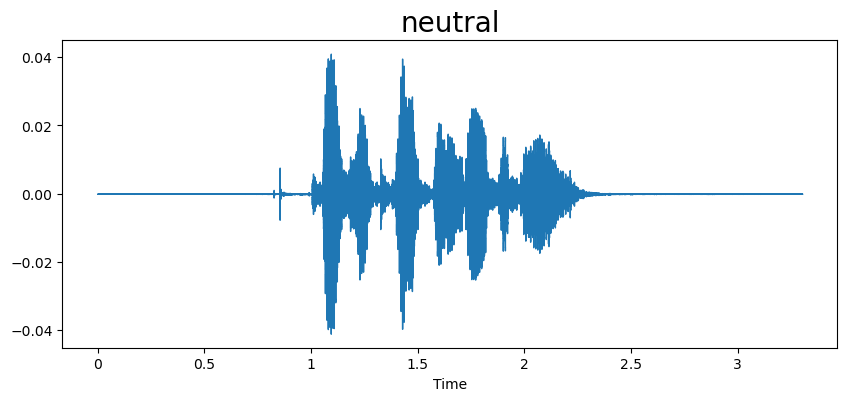

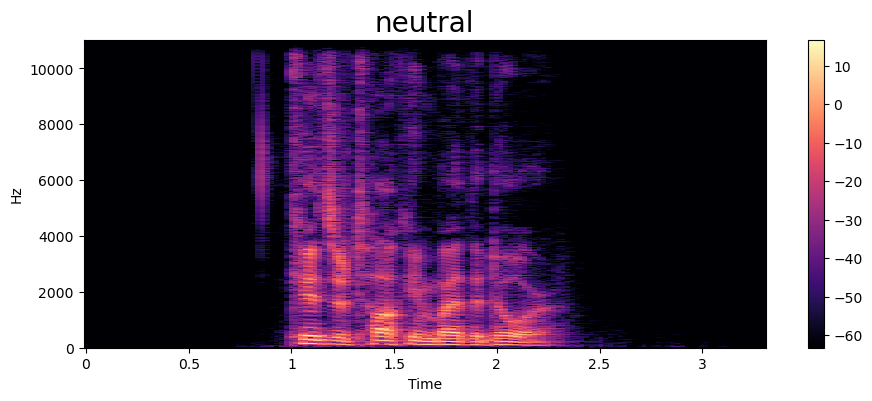

In [5]:
emotion = 'neutral'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion='angry'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [6]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
def pitch(data,sr):
    return librosa.effects.pitch_shift(data,sr)

In [7]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    

    return audio

In [8]:
data_path=pd.read_csv('data_path.csv')

In [9]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start) 

3it [00:00,  8.12it/s]

0 audio has been processed


503it [00:42, 12.06it/s]

500 audio has been processed


1003it [01:25, 11.96it/s]

1000 audio has been processed


1502it [02:07, 13.38it/s]

1500 audio has been processed


2002it [02:46, 12.53it/s]

2000 audio has been processed


2502it [03:23, 13.43it/s]

2500 audio has been processed


3004it [03:58, 14.21it/s]

3000 audio has been processed


3502it [04:34, 14.01it/s]

3500 audio has been processed


4003it [05:14, 13.46it/s]

4000 audio has been processed


4503it [05:50, 12.88it/s]

4500 audio has been processed


5002it [06:25, 13.08it/s]

5000 audio has been processed


5502it [07:00, 13.29it/s]

5500 audio has been processed


6004it [07:35, 14.27it/s]

6000 audio has been processed


6504it [08:11, 14.82it/s]

6500 audio has been processed


7003it [08:46, 15.04it/s]

7000 audio has been processed


7504it [09:22, 14.72it/s]

7500 audio has been processed


8002it [09:59, 14.11it/s]

8000 audio has been processed


8502it [10:35, 14.91it/s]

8500 audio has been processed


9003it [11:09, 18.88it/s]

9000 audio has been processed


9504it [11:39, 16.27it/s]

9500 audio has been processed


10004it [12:11, 15.06it/s]

10000 audio has been processed


10502it [12:46, 13.10it/s]

10500 audio has been processed


11003it [13:18, 16.85it/s]

11000 audio has been processed


11502it [13:49, 14.80it/s]

11500 audio has been processed


12002it [14:27, 12.18it/s]

12000 audio has been processed


12162it [14:39, 13.83it/s]

Done
Time:  879.6610717999283


In [10]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('Emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.249512,0.372070,0.494629,0.490723,0.484863,0.498535,0.508301,0.495605,0.499512,0.480957,...,3.646811,0.842323,-1.661050,-2.251751,-1.605869,-0.246802,-4.532624,-2.764623,-4.103858,neutral
2,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
3,0.248535,0.365234,0.497559,0.487793,0.498047,0.506348,0.503906,0.508789,0.498047,0.497070,...,5.258634,-5.171889,-4.175773,1.348403,3.722368,-2.318639,1.070062,1.743142,-3.121900,neutral
4,0.183105,0.376953,0.551270,0.642090,0.800781,0.777832,0.801270,0.789551,0.794922,0.850098,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [11]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(24324, 2377)

In [12]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [14]:
print(Y.shape)
print(X.shape)

(24324, 8)
(24324, 2376)


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19459, 2376), (19459, 8), (4865, 2376), (4865, 8))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19459, 2376), (4865, 2376), (19459, 8), (4865, 8))

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((17513, 2376), (4865, 2376), (1946, 2376), (17513, 8), (4865, 8), (1946, 8))

In [18]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((17513, 2376), (4865, 2376), (1946, 2376), (17513, 8), (4865, 8), (1946, 8))

In [19]:
# We have to use 1-dimensional CNN which need specifical shape:
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(17513, 2376, 1)

In [20]:
from keras.callbacks import EarlyStopping

# Define your early stopping criteria
earlystopping = EarlyStopping(
    monitor="val_acc",  # Metric to monitor (validation accuracy in this case)
    mode='auto',         # Whether to minimize or maximize the monitored metric (auto mode selects based on the metric)
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Whether to restore model weights from the epoch with the best value of the monitored metric
)


In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [22]:
import keras.backend as K

import tensorflow as tf

def precision_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


In [ ]:
from keras.models import Sequential
from keras import layers


model = Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(X_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(8, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc", f1_m])

In [ ]:
model.summary()

In [ ]:
EPOCHS = 20
batch_size = 64

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=EPOCHS, batch_size=batch_size,
                    callbacks=[earlystopping, learning_rate_reduction])

In [ ]:
# Assuming 'model' is your trained model
model.save('trained_model_all.h5')

In [23]:
from keras.models import load_model

# Load the model
model = load_model('trained_model_all.h5')


In [ ]:
import os

model_file = 'trained_model_all.h5'

if os.path.exists(model_file):
    print("The model has been saved.")
else:
    print("The model has not been saved.")

In [24]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")


ValueError: Could not interpret metric identifier: f1_m

In [28]:
import keras.backend as K

import tensorflow as tf

def precision_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


# Compile the model using the custom metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m])

# Then, evaluate your model
print("Accuracy of our model on test data:", model.evaluate(X_test, y_test)[1]*100, "%")


153/153 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.7510 - f1_m: 0.7509 - loss: 1.4561
Accuracy of our model on test data: 75.00513792037964 %


In [36]:
import pickle

# Assuming 'history' is the variable containing the history object
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


NameError: name 'history' is not defined

NameError: name 'history' is not defined

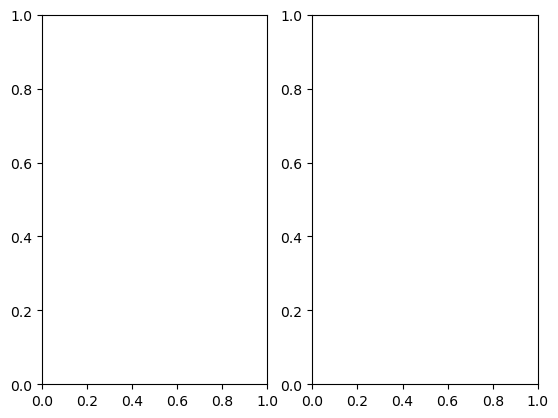

In [29]:

fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
test_acc = history.history['val_acc']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [30]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

153/153 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step


array([5, 5, 6, ..., 0, 4, 2], dtype=int64)

In [31]:
y_check = np.argmax(y_test, axis=1)
y_check

array([5, 2, 2, ..., 0, 4, 2], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_check, y_pred=y_pred)

In [33]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[629   1  37  11  37  25   2   1]
 [  3  56   2   5   3   6   2   0]
 [ 56   3 579  20  28  54  49   1]
 [ 57   0  34 487  68  50  58   1]
 [ 78   0  37  36 598  31  21   3]
 [ 19   1  43  14  35 520  33   4]
 [ 12  12  58  19  21  68 569   0]
 [ 14   0   9   9  24   1   0 211]]


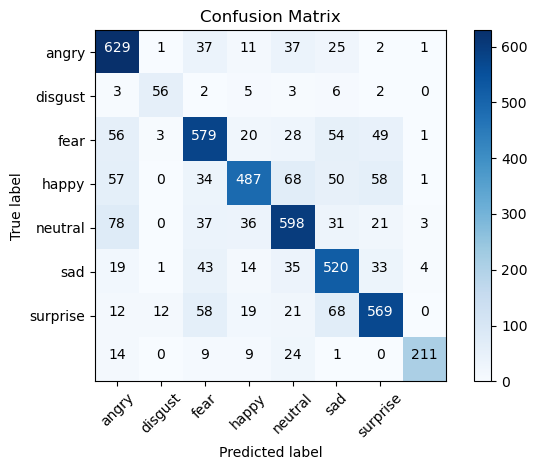

In [35]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Now you can call the function to plot the confusion matrix
cm_plot_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [38]:
# predicting on test data.
pred_test0 = model.predict(X_test)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0

153/153 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step


,Predicted Labels,Actual Labels
0,neutral,neutral
1,neutral,disgust
2,sad,disgust
3,angry,happy
4,surprise,surprise
...,...,...
4860,sad,sad
4861,happy,happy
4862,angry,angry
4863,happy,happy


In [1]:
import librosa
import numpy as np
from keras.models import load_model

# Load the pre-trained model
model = load_model('trained_model_all.h5')

def extract_features(audio_file, sr=22050):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=sr, duration=3)
    
    # Extract features (e.g., MFCCs)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return mfccs

def predict_emotion(audio_file):
    # Extract features from the audio file
    features = extract_features(audio_file)
    
    # Reshape the features to match the input shape expected by the model
    features = np.expand_dims(features, axis=0)
    features = np.expand_dims(features, axis=3)
    
    # Make predictions using the pre-trained model
    predicted_emotion = model.predict(features)
    
    # Decode the predicted emotion
    # (This depends on how your model was trained and what labels were used)
    # For example, if your model outputs probabilities for each emotion class,
    # you may want to map the predicted probabilities to emotion labels.
    emotion_labels = ["happy", "sad", "angry", "neutral"]  # Example labels
    predicted_emotion_label = emotion_labels[np.argmax(predicted_emotion)]
    
    return predicted_emotion_label

# Example usage
audio_file = input("Enter the path to the audio file: ")
predicted_emotion = predict_emotion(audio_file)
print("Predicted emotion:", predicted_emotion)


Enter the path to the audio file: C:\Users\Sarvadnya\TESS Toronto emotional speech set data\YAF_sad


C:\Users\Sarvadnya\AppData\Local\Temp\ipykernel_3648\1391734998.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=sr, duration=3)
C:\Users\Sarvadnya\anaconda3\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Sarvadnya\\TESS Toronto emotional speech set data\\YAF_sad'